In [7]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit import execute
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-07-19 17:09:44,873: Credentials are already in use. The existing account in the session will be replaced.


In [2]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [3]:
qasm_sim = Aer.get_backend("qasm_simulator")
statevector_sim = Aer.get_backend("statevector_simulator")

In [8]:
def run_on_simulators(circuit):
    statevec_job = execute(circuit,backend = statevector_sim)
    result = statevec_job.result()
    statevec = result.get_statevector()
    
    num_qubits = circuit.num_qubits
    circuit.measure([i for i in range(num_qubits)],[i for i in range(num_qubits)])
    
    qasm_job = execute(circuit,backend = qasm_sim , shots = 1024).result() # shots (epoch aslında)
    counts = qasm_job.get_counts()
    
    return statevec,counts

In [9]:
circuit = QuantumCircuit(2,2)
statevec, counts = run_on_simulators(circuit)

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


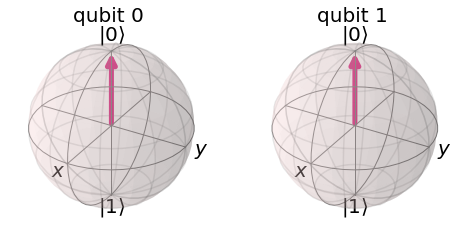

In [10]:
plot_bloch_multivector(statevec)
#burda çıkan şekil, Qsphere'deki gibi gideceği yönü değil de direkt sonucu gösteriyor

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


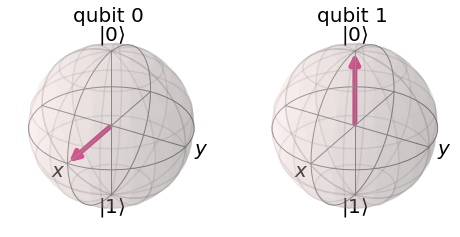

In [11]:
circuit.h(0)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)
# şekilde de görüldüğü gibi bizim Hadamard ile yaptığımız yukarı durumdan aşağıdaki duruma getirmek

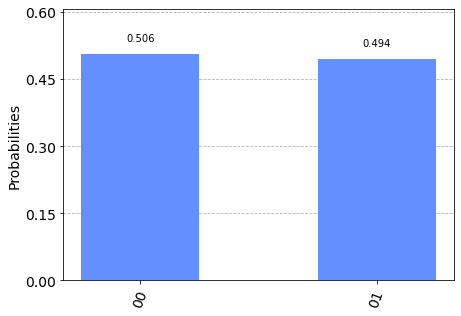

In [12]:
plot_histogram([counts]) 
# 2 qubitin varsa ve ilkine hadamard yaparsan sadece 00 veya 01 sonuçlarını alırsın

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


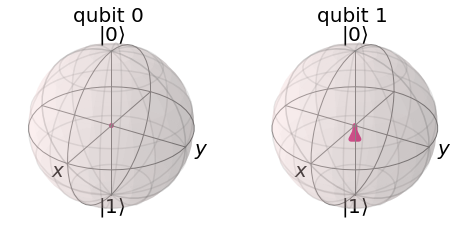

In [17]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1) # h ve cx ile süperpozisyon ve entanglement durumlarına getirdik
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

"""şekilde görüldüğü gibi state vector kayboldu çünkü ikisi de entanglement da (ikiside birbirine bağlı
ya 00 ya 11 olucak)"""
# bu tür durumlarda QSphere ile bakmak daha mantıklı
# bu statevector matematiksel olarak gösterir, Qsphere ise olasılıksal olarak

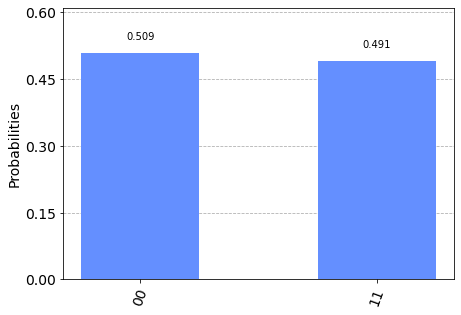

In [18]:
plot_histogram([counts])

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


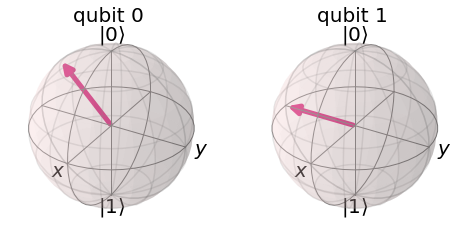

In [22]:
import math
circuit = QuantumCircuit(2,2)
circuit.rx(math.pi/4,0)#pi yi dörde bol o kadar sayıda 0.indexteki qubiti(ilk qubiti) o kadar rotate et
circuit.rx(math.pi/2,1)# pi/2 kadar 2. qubiti döndürür . Döndürmeler rx old için X ekseninde
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

# bu şekilde de statevector yaptık yani illa sabit şeylerle yapmak zrounda değiliz

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


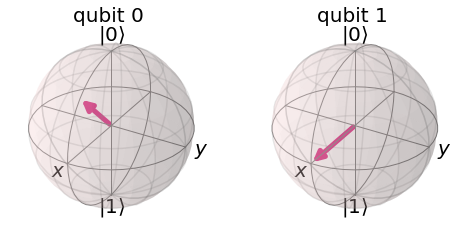

In [23]:

circuit = QuantumCircuit(2,2)
circuit.ry(math.pi/4,0)#döndürmeler ry old. için y ekseninde
circuit.ry(math.pi/2,1)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


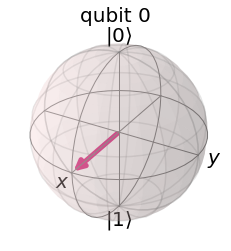

In [25]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


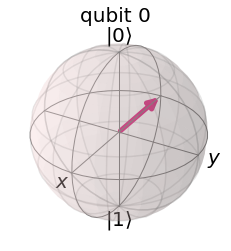

In [26]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
circuit.z(0) # z koymak yani işaret değiştirmek neymiş aşağıda görüyoruz
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

""" Z gate kullanınca bu qubitin PHASE'i değişti 
T,Z,S,T',S' gateleri hepsi farklı rotasyonlar yapıyor """